# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Load dataset
df = pd.read_csv('/content/sample_data/clustering_covid19.csv')

In [3]:
df

,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid,Cluster
0,13,1570,248,1537,4,12,16,9,10,19,136,21,698,1
1,1,1218,165,1183,1,4,5,1,6,7,50,6,584,1
2,4,1223,262,1205,2,6,8,14,11,25,103,4,515,1
3,13,1570,248,1537,6,16,22,10,12,22,152,20,675,1
4,5,1520,180,1473,10,8,18,9,13,22,50,43,644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,11,4954,437,4808,26,5,31,28,2,30,19,27,2464,1
3526,11,4954,437,4808,31,3,34,16,6,22,13,40,2341,1
3527,11,4954,437,4808,25,6,31,30,4,34,15,35,3174,1
3528,11,4954,437,4808,8,16,24,8,2,10,23,4,2854,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Membagi fitur dan target ke dalam variabel X dan y
X = df.drop(columns=['Cluster'])
y = df['Cluster']

In [5]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# Melakukan klasifikasi menggunakan random forest dan knn
rf = RandomForestClassifier().fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred1 = knn.predict(X_test)

Random Forest dipilih karena mampu menangani data kompleks dengan banyak fitur, mengurangi overfitting melalui teknik ensemble, serta memberikan informasi penting terkait fitur yang berpengaruh dalam prediksi. Algoritma ini juga tahan terhadap noise dan memiliki generalisasi yang baik. Sementara itu, K-Nearest Neighbors (KNN) dipilih karena kesederhanaannya, tidak memerlukan asumsi distribusi data, serta efektif dalam mendeteksi pola berbasis kedekatan antar data.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [7]:
from sklearn.metrics import classification_report

# Evaluasi model menggunakan akurasi, precision, recall, dan f1-score pada model random forest
print(classification_report(y_test, y_pred))
# Evaluasi model menggunakan akurasi, precision, recall, dan f1-score pada model knn
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       371
           2       1.00      1.00      1.00       282

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99       371
           2       0.98      0.99      0.98       282

    accuracy                           0.99       706
   macro avg       0.98      0.98      0.98       706
weighted avg       0.99      0.99      0.99       706



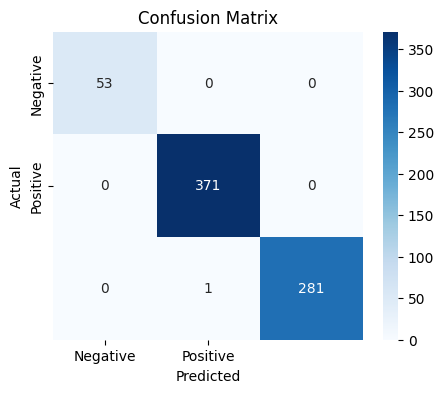

In [8]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

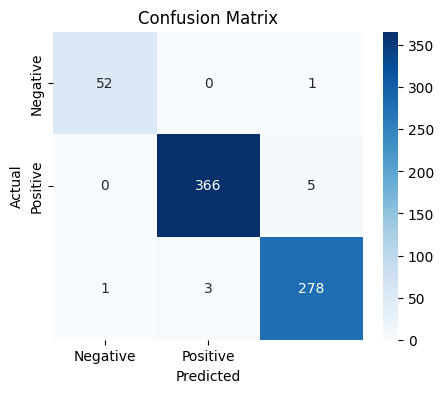

In [9]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred1)

# Visualisasi confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [10]:
from sklearn.metrics import accuracy_score

# Mengecek akurasi training model random forest
y_train_pred = rf.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy Training Random Forest:", accuracy)

# Mengecek akurasi training model knn
y_train_pred1 = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred1)
print("Accuracy Training KNN:", accuracy)

Accuracy Training Random Forest: 1.0
Accuracy Training KNN: 0.9922096317280453


Berdasarkan hasil pengecekan prediksi pada data pelatihan dan pengujian, diperoleh akurasi yang tidak terlalu berbeda, yang menunjukkan bahwa model tersebut tidak overfitting. Namun, disarankan untuk menambah jumlah data agar model dapat lebih efektif dalam menangkap pola yang lebih beragam. Selain itu, eksperimen dengan model lain pada masalah klasifikasi juga disarankan untuk meningkatkan performa.